# Cohort Analysis

long-term of App or web-service does not mean only getting people to download, but also getting repeating visits.  
Therefore, we need some more complex metrics that vanity metrics:
- download counts and 
- daily active users (DAU)
- monthly active users (MAU) - that only measure growth and retention superficially (not deeply).  


### What is Cohort Analysis?  
- It is a subset of subset of behavior analytics that takes data about users and rather than looking at All users, it breaks them into related groups for analysis.
- Cohorts (groups) usually share common characteristics
- It is a tool to measure user engagement over time. It helps to understand whether user engagement is actually getting better over time or is only appearing to improve because of growth.  
- it is valuable, since allows to separate **growth metrics** from **engagement** metrics as growth can mask Engagement problems. 

let  us understand this using cohort analysis with example - daily cohort of users who have launched an app 1st time and revisited the app in the next 10 days  
![](./pic/1.png)

we can see:
- 1 358 users launched app on Jan 26,
- Day 1 retention was 31.1%
- Day 6 retention = 12.9%
- Day 9 retention = 11.3% (1 in 8 users who launched an app on Jan 26 were still active users on the app)
- Out of all of the new users during this time range (13 487 users), 27% users are retained on day 1
- day 7 retained 12.5 and
- day 10 retained 12.1


2 benefits of reading cohort table:
- product lifetime (as depicted vertically down in the table)- comparing different cohorts at the same stage in their life cycle - we can see % of users in a cohort are coming back after 3 days and so on. The early lifetime months can be linked to the quality of your onboarding experience and the performance of customer success team
- user lifetime (horizontally to the right) - seeing the long term relationship with people in any cohort - to ascertain how long people are coming back and how strong or how valuable that cohort is. This can be presumable linked to something like the quality of the product, operations and customer support

Whatever the evaluation key metrics we define for the business, cohort analysis lets us view how the metrics develop over the customer lifetime as well as over the product lifetime

### Cohort Analysis to Improve Customer Retention

Youtube video tutorial by "Absent Data": [Cohort Analysis with Python from Scratch | Easy Code](https://www.youtube.com/watch?v=WWUG7T9ixTs)

- Cohort - customer segment defined by:
    - time - the most popular type of customer segmentation
    - size
    - behavior

to understand it we create a pivot table:
- rows:
    - activity
    - month of acquisition
- columns:
    - retention
    - month since acquisition

![](./pic/2.png)

To understand it better let's look at the example:  
- in May 2011 (time cohort) - we look at what happened 7 month later with these users:  
    - we can see that we have 27% of users active

we will use "Online Retail" dataset from UCI Machine Learning Repository : [Online_ratail_dataset](https://archive.ics.uci.edu/ml/datasets/online+retail)

In [37]:
import datetime

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [38]:
#load data:
data = pd.read_excel('./data/Online_Retail.xlsx')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [40]:
# drop rows without customer id:
data = data.dropna(subset='CustomerID')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [42]:
# get month from the datetime:
def get_month(x):
    return datetime.datetime(x.year, x.month, 1)

data['InvoiceMonth'] = data['InvoiceDate'].apply(lambda x: (get_month(x)))

We will use this to create Cohorts Month base on Invoice Month:
- we going to get 1st month that we acquired the customer (the 1st time we saw the customer id)
- we will create new column index with the minimum date (first time customer was acquired)

In [43]:
data['Cohort Month'] = data.groupby('CustomerID')['InvoiceMonth'].transform('min')
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01


Now we want to see what is the difference between Cohort Month (when user 1st appeared) and Invoice Date
- by that we can see for how long user is still with us

In [44]:
# function to get time series for subtraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

In [45]:
_, Invoice_month, Invoice_year = get_date_elements(data, 'InvoiceMonth')
_, Cohort_month, Cohort_year = get_date_elements(data, 'Cohort Month')

# now we can subtract these series to get the difference:
# create a cohort index, when user was acquired (how long they are active)
year_diff = Invoice_year - Cohort_year
month_diff = Invoice_month - Cohort_month
data['CohortIndex'] = year_diff*12+month_diff+1 # we add 1 to let users who were active only for 1 month to appear
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


Now we can create a Pivot Table:
- we can groupby Cohort Month and Cohort Index and count number of users (Customer Id)

In [46]:
# count customer id by Cohort Month, Cohort Index (how long they are active)
cohort_data = data.groupby(['Cohort Month', 'CohortIndex'], as_index=False)['CustomerID'].apply(pd.Series.nunique)
cohort_data

,Cohort Month,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [47]:
# pivot_table:
cohort_table = cohort_data.pivot(index='Cohort Month', columns=['CohortIndex'], values=['CustomerID'])
cohort_table

CustomerID                                                   \
CohortIndex          1      2      3      4      5      6      7      8    
Cohort Month                                                               
2010-12-01        948.0  362.0  317.0  367.0  341.0  376.0  360.0  336.0   
2011-01-01        421.0  101.0  119.0  102.0  138.0  126.0  110.0  108.0   
2011-02-01        380.0   94.0   73.0  106.0  102.0   94.0   97.0  107.0   
2011-03-01        440.0   84.0  112.0   96.0  102.0   78.0  116.0  105.0   
2011-04-01        299.0   68.0   66.0   63.0   62.0   71.0   69.0   78.0   
2011-05-01        279.0   66.0   48.0   48.0   60.0   68.0   74.0   29.0   
2011-06-01        235.0   49.0   44.0   64.0   58.0   79.0   24.0    NaN   
2011-07-01        191.0   40.0   39.0   44.0   52.0   22.0    NaN    NaN   
2011-08-01        167.0   42.0   42.0   42.0   23.0    NaN    NaN    NaN   
2011-09-01        298.0   89.0   97.0   36.0    NaN    NaN    NaN    NaN   
2011-10-01        352.0   93.0   46.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01        321.0   43.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01         41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
CohortIndex      9      10     11     12     13  
Cohort Month                                     
2010-12-01    336.0  374.0  354.0  474.0  260.0  
2011-01-01    131.0  146.0  155.0   63.0    NaN  
2011-02-01     98.0  119.0   35.0    NaN    NaN  
2011-03-01    127.0   39.0    NaN    NaN    NaN  
2011-04-01     25.0    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

In [48]:
# change index:
cohort_table.index = cohort_table.index.strftime('%B %Y')

<AxesSubplot:xlabel='None-CohortIndex', ylabel='Cohort Month'>

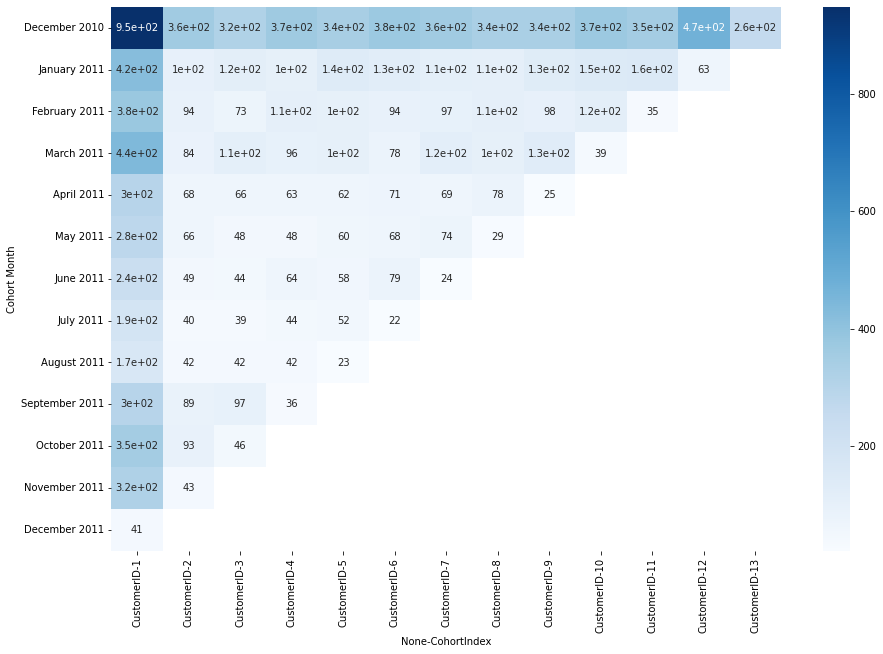

In [49]:
# visualize results in heatmap:
plt.figure(figsize=(15,10))
sns.heatmap(cohort_table, annot=True, cmap='Blues')

In [51]:
# create percentage:
cohort_perc = cohort_table.divide(cohort_table.iloc[:,0], axis=0)
cohort_perc

CustomerID                                                    \
CohortIndex            1         2         3         4         5         6    
Cohort Month                                                                  
December 2010         1.0  0.381857  0.334388  0.387131  0.359705  0.396624   
January 2011          1.0  0.239905  0.282660  0.242280  0.327791  0.299287   
February 2011         1.0  0.247368  0.192105  0.278947  0.268421  0.247368   
March 2011            1.0  0.190909  0.254545  0.218182  0.231818  0.177273   
April 2011            1.0  0.227425  0.220736  0.210702  0.207358  0.237458   
May 2011              1.0  0.236559  0.172043  0.172043  0.215054  0.243728   
June 2011             1.0  0.208511  0.187234  0.272340  0.246809  0.336170   
July 2011             1.0  0.209424  0.204188  0.230366  0.272251  0.115183   
August 2011           1.0  0.251497  0.251497  0.251497  0.137725       NaN   
September 2011        1.0  0.298658  0.325503  0.120805       NaN       NaN   
October 2011          1.0  0.264205  0.130682       NaN       NaN       NaN   
November 2011         1.0  0.133956       NaN       NaN       NaN       NaN   
December 2011         1.0       NaN       NaN       NaN       NaN       NaN   

                                                                            \
CohortIndex           7         8         9         10        11        12   
Cohort Month                                                                 
December 2010   0.379747  0.354430  0.354430  0.394515  0.373418  0.500000   
January 2011    0.261283  0.256532  0.311164  0.346793  0.368171  0.149644   
February 2011   0.255263  0.281579  0.257895  0.313158  0.092105       NaN   
March 2011      0.263636  0.238636  0.288636  0.088636       NaN       NaN   
April 2011      0.230769  0.260870  0.083612       NaN       NaN       NaN   
May 2011        0.265233  0.103943       NaN       NaN       NaN       NaN   
June 2011       0.102128       NaN       NaN       NaN       NaN       NaN   
July 2011            NaN       NaN       NaN       NaN       NaN       NaN   
August 2011          NaN       NaN       NaN       NaN       NaN       NaN   
September 2011       NaN       NaN       NaN       NaN       NaN       NaN   
October 2011         NaN       NaN       NaN       NaN       NaN       NaN   
November 2011        NaN       NaN       NaN       NaN       NaN       NaN   
December 2011        NaN       NaN       NaN       NaN       NaN       NaN   

                          
CohortIndex           13  
Cohort Month              
December 2010   0.274262  
January 2011         NaN  
February 2011        NaN  
March 2011           NaN  
April 2011           NaN  
May 2011             NaN  
June 2011            NaN  
July 2011            NaN  
August 2011          NaN  
September 2011       NaN  
October 2011         NaN  
November 2011        NaN  
December 2011        NaN

<AxesSubplot:xlabel='None-CohortIndex', ylabel='Cohort Month'>

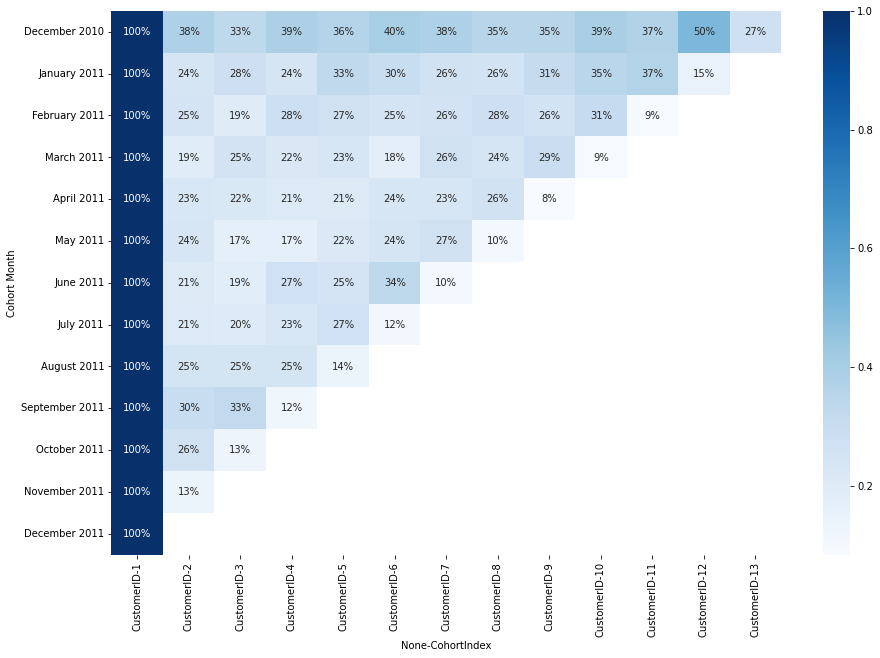

In [54]:
# vis
plt.figure(figsize=(15,10))
sns.heatmap(cohort_perc, annot=True, cmap='Blues', fmt='.0%')

<AxesSubplot:xlabel='None-CohortIndex', ylabel='Cohort Month'>

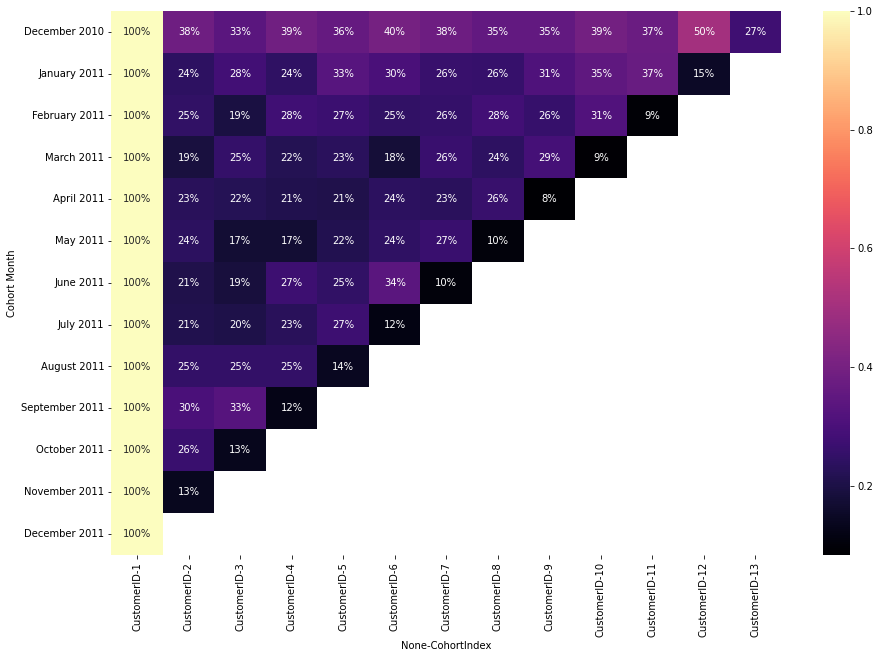

In [55]:
# vis
plt.figure(figsize=(15,10))
sns.heatmap(cohort_perc, annot=True, cmap='magma', fmt='.0%')

<AxesSubplot:xlabel='None-CohortIndex', ylabel='Cohort Month'>

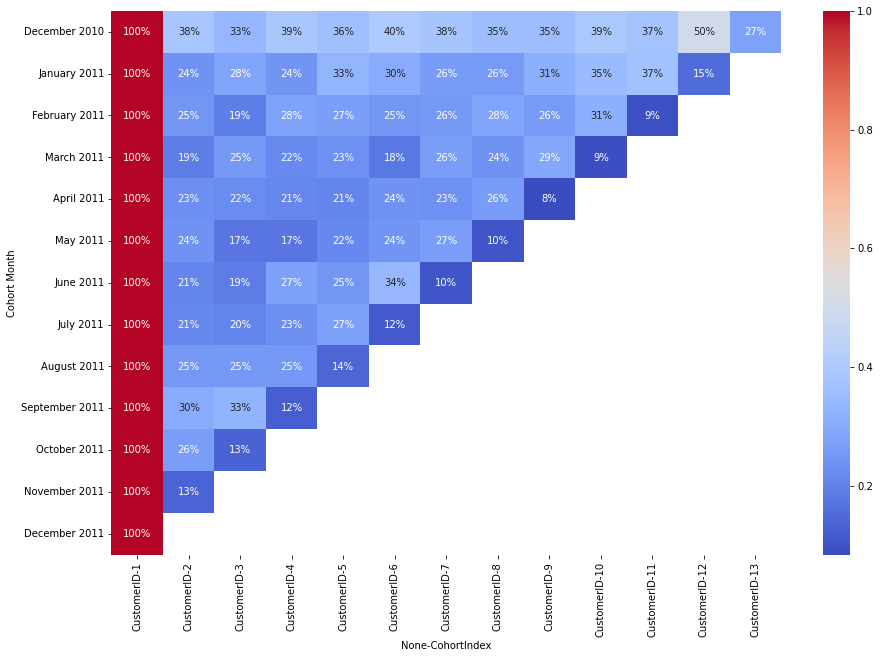

In [57]:
# vis
plt.figure(figsize=(15,10))
sns.heatmap(cohort_perc, annot=True, cmap='coolwarm', fmt='.0%')

Now what we can do:
- we can analyze each month and inspect the efficiency of our marketing campaign in which was done in specific months
- in March 2011 we can see significant drop off